# Bafômetro.py

Junção Grahcyanne's + Phosphorus do python = <b>Magos do Pump</b>

---
Neste notebook, tentamos sintetizar todo o conhecimento adquido ao longo do semestre, com a implementação de estratégias de aprendizado de máquina em um dataset não didático.

Importando todas as bibliotecas que serão usadas ao longo do notebook:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import imblearn
import pickle
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from optuna import create_study, Trial

Criando o dataframe a partir do arquivo .csv com o dataset:

In [2]:
nome_do_arquivo = "smoking_dataset_deus.csv"
df = pd.read_csv(nome_do_arquivo)
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26956,Male,40,170,70,91.0,1.2,1.2,1.0,1.0,124.0,...,121.0,104.0,15.6,1.0,0.8,36.0,59.0,47.0,2.0,Y
26957,Male,65,160,65,87.0,1.0,1.0,1.0,1.0,133.0,...,59.0,177.0,15.5,1.0,1.0,29.0,20.0,43.0,2.0,Y
26958,Female,50,155,55,77.0,1.2,1.2,1.0,1.0,138.0,...,205.0,320.0,14.4,1.0,0.8,25.0,23.0,39.0,1.0,N
26959,Male,40,170,90,92.0,0.9,1.0,1.0,1.0,140.0,...,143.0,362.0,17.2,1.0,0.8,30.0,57.0,146.0,2.0,Y


Explorando o dataset:

In [3]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,26961.000000,26961.000000,26961.000000,26961.000000,26961.000000,26961.000000,26961.000000,26961.000000,26961.000000,26961.000000,...,26961.000000,26961.000000,26961.000000,26961.000000,26961.000000,26961.000000,26961.000000,26961.000000,26961.000000,26961.000000
mean,47.572234,162.304069,63.322206,81.282831,0.981863,0.979177,1.029079,1.029302,122.479953,76.085902,...,57.226624,113.073031,133.225808,14.234246,1.098364,0.859438,25.832833,25.687623,36.921961,1.612477
std,14.142484,9.274041,12.514872,12.440768,0.615970,0.601425,0.168031,0.168654,14.574198,9.955917,...,51.411960,45.845803,118.219867,1.580116,0.446846,0.321233,15.919488,24.687246,47.775015,0.820978
min,20.000000,135.000000,30.000000,35.000000,0.100000,0.100000,1.000000,1.000000,75.000000,42.000000,...,4.000000,1.000000,1.000000,6.100000,1.000000,0.100000,4.000000,2.000000,2.000000,1.000000
25%,35.000000,155.000000,55.000000,74.200000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,107.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.600000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,30.000000,40.000000,2.000000
max,85.000000,190.000000,130.000000,999.000000,9.900000,9.900000,2.000000,2.000000,230.000000,160.000000,...,8110.000000,5119.000000,9490.000000,20.300000,6.000000,23.000000,924.000000,2309.000000,999.000000,3.000000


Analisando os tipos de dados do dataframe:

In [4]:
print(df.dtypes)

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object


Convertendo os dados para os tipos mais adequados:

In [5]:
df = df.convert_dtypes()
print(df.dtypes)

sex                 string[python]
age                          Int64
height                       Int64
weight                       Int64
waistline                  Float64
sight_left                 Float64
sight_right                Float64
hear_left                    Int64
hear_right                   Int64
SBP                          Int64
DBP                          Int64
BLDS                         Int64
tot_chole                    Int64
HDL_chole                    Int64
LDL_chole                    Int64
triglyceride                 Int64
hemoglobin                 Float64
urine_protein                Int64
serum_creatinine           Float64
SGOT_AST                     Int64
SGOT_ALT                     Int64
gamma_GTP                    Int64
SMK_stat_type_cd             Int64
DRK_YN              string[python]
dtype: object


<u>Conversões:</u><br>
Transformando a coluna DRK_YN, que antes era em N e Y, para 0 e 1 - respectivamente.

In [6]:
df_one = pd.get_dummies(df["DRK_YN"])
df_two = pd.concat((df_one, df), axis=1)
df_two = df_two.drop(["DRK_YN"], axis=1)
df_two = df_two.drop(["N"], axis=1)
df = df_two.rename(columns={"Y": "DRK_YN"})
print(df)

       DRK_YN     sex  age  height  weight  waistline  sight_left  \
0        True    Male   35     170      75       90.0         1.0   
1       False    Male   30     180      80       89.0         0.9   
2       False    Male   40     165      75       91.0         1.2   
3       False    Male   50     175      80       91.0         1.5   
4       False    Male   50     165      60       80.0         1.0   
...       ...     ...  ...     ...     ...        ...         ...   
26956    True    Male   40     170      70       91.0         1.2   
26957    True    Male   65     160      65       87.0         1.0   
26958   False  Female   50     155      55       77.0         1.2   
26959    True    Male   40     170      90       92.0         0.9   
26960    True    Male   55     155      50       70.0         1.0   

       sight_right  hear_left  hear_right  ...  HDL_chole  LDL_chole  \
0              1.0          1           1  ...         48        126   
1              1.2         

Definindo nossas features, target, quantidade de dados que são reservados para o teste, semente aleatória (que será a mesma para todo o código) e realizando o split de dados:

In [7]:
FEATURES = ["weight", "sight_left", "sight_right", "hear_left", "hear_right", "SBP", "DBP", "tot_chole", "HDL_chole", "LDL_chole", "triglyceride", "hemoglobin", "urine_protein", "serum_creatinine", "SGOT_AST", "SGOT_ALT", "gamma_GTP"]
TARGET = ["DRK_YN"]

df = df.reindex(FEATURES + TARGET, axis=1)
df = df.dropna()

X = df.reindex(FEATURES, axis=1)
y = df.reindex(TARGET, axis=1)

X = X.values
y = y.values.ravel()  # o método `ravel` deixa os dados em 1 dimensão

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455

X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

<u>Balanceando os dados:</u><br>
Utilizamos a técnica under-sampling, através da biblioteca imblearn.

In [8]:
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_treino, y_treino)

X_treino, y_treino = X_res, y_res

Redução de dimensionalidade por análise das componentes principais (PCA):

In [9]:
pca = PCA()

pca.fit(X)

autovalores = pca.explained_variance_
autovetores = pca.components_.T

variancia_explicada = pca.explained_variance_ratio_

Plotando a variância das features:

[None]

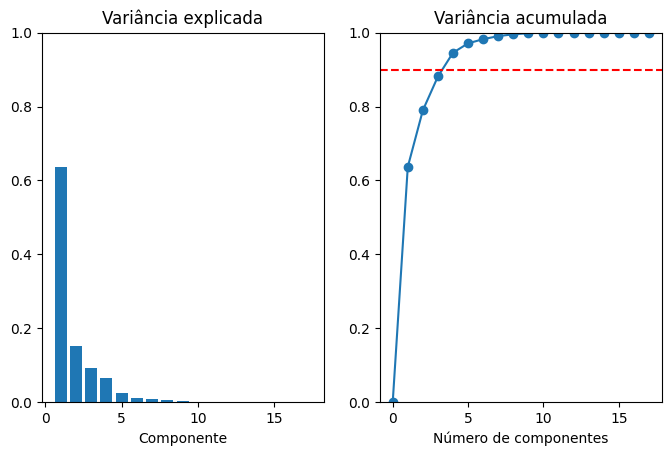

In [10]:
id_componentes = np.arange(1, pca.n_components_ + 1)

figura, eixos = plt.subplots(1, 2)

eixos[0].bar(id_componentes, variancia_explicada)
eixos[0].set(xlabel="Componente", title="Variância explicada", ylim=(0.0, 1.0))

cv = np.cumsum(pca.explained_variance_ratio_)
eixos[1].plot(np.r_[0, id_componentes], np.r_[0, cv], marker="o")
eixos[1].set(
    xlabel="Número de componentes",
    title="Variância acumulada",
    ylim=(0.0, 1.0),
)
eixos[1].axhline(0.9, linestyle="--", color="red")

figura.set(figwidth=8)

<u>Treinando o modelo composto de Dummy Classifier:</u><br>
Utilizamos pipeline com as seguintes etapas: normalização de dados feita pelo método StandardScaler(), PCA com as features mais relevântes e o modelo DummyClassifier().

<Axes: >

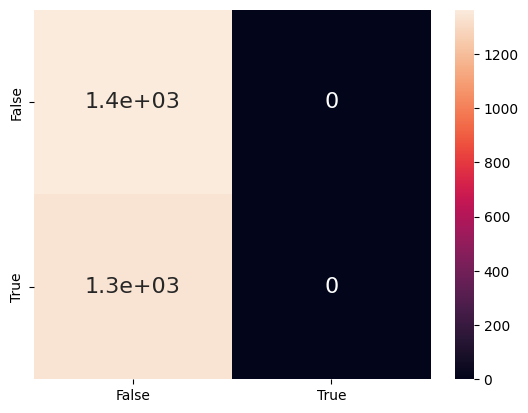

In [11]:
modelo_baseline_composto = make_pipeline(
    StandardScaler(),
    PCA(n_components=4),
    DummyClassifier()
)

modelo_baseline_composto.fit(X_treino, y_treino)
nomes_das_features = np.unique(y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_baseline_composto.predict(X_teste)

matriz_conf = confusion_matrix(y_verdadeiro, y_previsao, labels = nomes_das_features)

df_conf = pd.DataFrame(matriz_conf, nomes_das_features, nomes_das_features)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

Computando a acurácia:

In [12]:
print(
    classification_report(
        y_verdadeiro, y_previsao
    )
)

              precision    recall  f1-score   support

       False       0.51      1.00      0.67      1363
        True       0.00      0.00      0.00      1334

    accuracy                           0.51      2697
   macro avg       0.25      0.50      0.34      2697
weighted avg       0.26      0.51      0.34      2697



/home/izaque23003/anaconda3/envs/ilumpy/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/izaque23003/anaconda3/envs/ilumpy/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/izaque23003/anaconda3/envs/ilumpy/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

<u>Treinando o modelo composto de KNN classificador: </u><br>
Utilizamos pipeline com as seguintes etapas: normalização de dados feita pelo método StandardScaler(), PCA com as features mais relevântes e o modelo KNeighborsClassifier().

<Axes: >

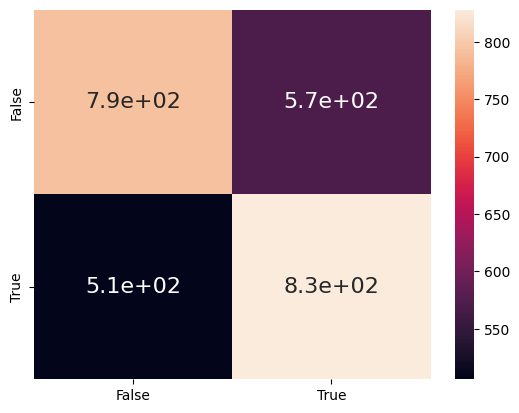

In [13]:
modelo_knn_composto = make_pipeline(
    StandardScaler(),
    PCA(n_components=4),
    KNeighborsClassifier()
)

modelo_knn_composto.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_knn_composto.predict(X_teste)

matriz_conf = confusion_matrix(y_verdadeiro, y_previsao, labels = nomes_das_features)

df_conf = pd.DataFrame(matriz_conf, nomes_das_features, nomes_das_features)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

Computando a acurácia:

In [14]:
print(
    classification_report(
        y_verdadeiro, y_previsao
    )
)

              precision    recall  f1-score   support

       False       0.61      0.58      0.60      1363
        True       0.59      0.62      0.61      1334

    accuracy                           0.60      2697
   macro avg       0.60      0.60      0.60      2697
weighted avg       0.60      0.60      0.60      2697



<u>Treinando o modelo composto de Regressão Logística: </u><br>
Utilizamos pipeline com as seguintes etapas: normalização de dados feita pelo método StandardScaler(), PCA com as features mais relevântes e o modelo LogisticRegression().

<Axes: >

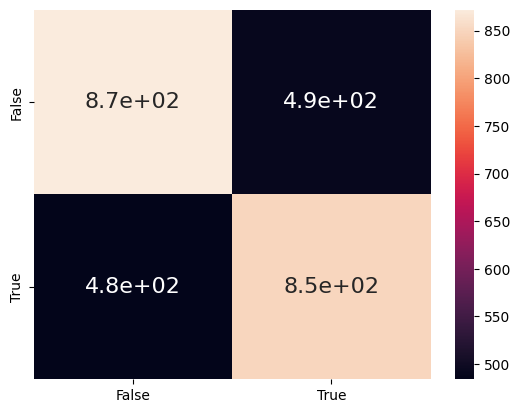

In [15]:
modelo_lr_composto = make_pipeline(
    StandardScaler(),
    PCA(n_components=4),
    LogisticRegression()
)

modelo_lr_composto.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_lr_composto.predict(X_teste)

matriz_conf = confusion_matrix(y_verdadeiro, y_previsao, labels = nomes_das_features)

df_conf = pd.DataFrame(matriz_conf, nomes_das_features, nomes_das_features)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

Computando a acurácia:

In [16]:
print(
    classification_report(
        y_verdadeiro, y_previsao
    )
)

              precision    recall  f1-score   support

       False       0.64      0.64      0.64      1363
        True       0.63      0.64      0.64      1334

    accuracy                           0.64      2697
   macro avg       0.64      0.64      0.64      2697
weighted avg       0.64      0.64      0.64      2697



<u>Treinando o modelo composto de Árvore de Decisão: </u><br>
Utilizamos pipeline com as seguintes etapas: normalização de dados feita pelo método StandardScaler(), PCA com as features mais relevântes e o modelo DecisionTreeClassifier().

<Axes: >

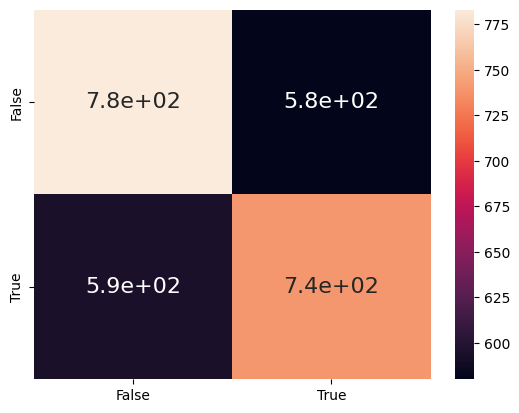

In [17]:
modelo_ad_composto = make_pipeline(
    StandardScaler(),
    PCA(n_components=4),
    DecisionTreeClassifier()
)

modelo_ad_composto.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_ad_composto.predict(X_teste)

matriz_conf = confusion_matrix(y_verdadeiro, y_previsao, labels = nomes_das_features)

df_conf = pd.DataFrame(matriz_conf, nomes_das_features, nomes_das_features)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

Computando a acurácia:

In [18]:
print(
    classification_report(
        y_verdadeiro, y_previsao
    )
)

              precision    recall  f1-score   support

       False       0.57      0.57      0.57      1363
        True       0.56      0.55      0.56      1334

    accuracy                           0.56      2697
   macro avg       0.56      0.56      0.56      2697
weighted avg       0.56      0.56      0.56      2697



<u>Treinando o modelo composto de Floresta Aleatória:</u><br>
Utilizamos pipeline com as seguintes etapas: normalização de dados feita pelo método StandardScaler(), PCA com as features mais relevântes e o modelo RandomForestClassifier().

<Axes: >

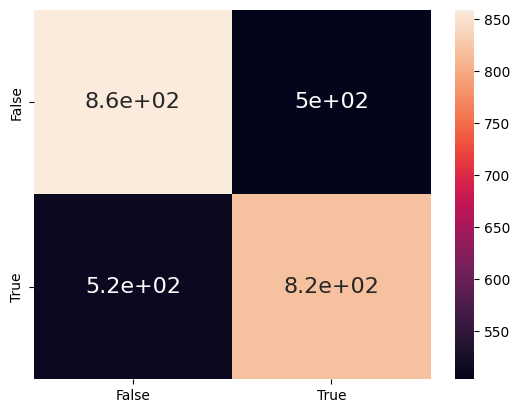

In [19]:
modelo_rf_composto = make_pipeline(
    StandardScaler(),
    PCA(n_components=4),
    RandomForestClassifier()
)

modelo_rf_composto.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_rf_composto.predict(X_teste)

matriz_conf = confusion_matrix(y_verdadeiro, y_previsao, labels = nomes_das_features)

df_conf = pd.DataFrame(matriz_conf, nomes_das_features, nomes_das_features)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

Computando a acurácia:

In [20]:
print(
    classification_report(
        y_verdadeiro, y_previsao
    )
)

              precision    recall  f1-score   support

       False       0.63      0.63      0.63      1363
        True       0.62      0.61      0.62      1334

    accuracy                           0.62      2697
   macro avg       0.62      0.62      0.62      2697
weighted avg       0.62      0.62      0.62      2697



Validação cruzada:

In [21]:
NUM_FOLDS = 10

metricas = cross_val_score(
    modelo_rf_composto,
    X,
    y,
    cv=NUM_FOLDS,
    scoring="accuracy",
)

print("As métricas foram: ", metricas)
print()
print("A média das métricas é de: ", metricas.mean())

As métricas foram:  [0.64330738 0.62425816 0.63909496 0.62648368 0.62425816 0.61313056
 0.6379822  0.62166172 0.64428783 0.61350148]

A média das métricas é de:  0.6287966132277979


A partir disso, vemos que a Floresta Aleatória teve a maior precisão. Por isso, escolhemos esse modelo para a otimização de hiperparâmetros. Utilizaremos o módulo optuna.

In [22]:
import pickle
from optuna import create_study, Trial

In [23]:
NUM_TENTATIVAS = 50

In [24]:
def cria_instancia_modelo(trial):
    """Cria uma instância do modelo.

    Args:
      trial: objeto tipo Trial do optuna.

    Returns:
      Uma instância do modelo desejado.
    """

    parametros = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 100),

        "criterion": trial.suggest_categorical("criterion", {"gini", "entropy", "log_loss"}),

        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20, log=True),

        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20, log=True),

        "max_features": trial.suggest_float("max_features_internal", 0, 1),

        "n_jobs": -1,

        "bootstrap": True,

        "random_state": SEMENTE_ALEATORIA,
    }

    model = RandomForestClassifier(**parametros)

    return model

A função objetivo em problema de otimização é a função que irá computar a nossa métrica de interesse. Neste caso, a métrica de interesse é a acurácia que foi obtida por validação cruzada.

In [25]:
def funcao_objetivo(
    trial,
    X,
    y,
    num_folds=NUM_FOLDS,
):
    """Função objetivo do optuna

    Referencia:
      https://medium.com/@walter_sperat/ using-optuna-with-sklearn-the-right-way-part-1-6b4ad0ab2451
    """

    modelo = cria_instancia_modelo(trial)

    metricas = cross_val_score(
        modelo,
        X,
        y,
        scoring="accuracy",
        cv=NUM_FOLDS,
    )

    return -metricas.mean()

A otimização em si é realizada criando um objeto de estudo, nesse caso o create_study.

In [32]:
objeto_de_estudo = create_study(direction="minimize")

[I 2023-11-15 20:46:02,468] A new study created in memory with name: no-name-5ed676a0-9dd4-4031-974b-593a13c3ae3e


Para rodar o otimizador precisamos de uma função objetivo que tenha apenas um argumento, o trial. Definindo a funcao_objetivo_parcial, para cumprir esse requisito:

In [33]:
def funcao_objetivo_parcial(trial):
    return funcao_objetivo(trial, X_treino, y_treino)

Rodando o otimizador com o método optimize:

In [34]:
objeto_de_estudo.optimize(funcao_objetivo_parcial, n_trials=NUM_TENTATIVAS)

[I 2023-11-15 20:46:20,364] Trial 0 finished with value: -0.6946091560611849 and parameters: {'n_estimators': 62, 'criterion': 'gini', 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features_internal': 0.15405563219343443}. Best is trial 0 with value: -0.6946091560611849.
[I 2023-11-15 20:46:29,518] Trial 1 finished with value: -0.6958058320124406 and parameters: {'n_estimators': 34, 'criterion': 'gini', 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features_internal': 0.2251798777188958}. Best is trial 1 with value: -0.6958058320124406.
[I 2023-11-15 20:47:56,356] Trial 2 finished with value: -0.697498000342847 and parameters: {'n_estimators': 89, 'criterion': 'log_loss', 'min_samples_split': 3, 'min_samples_leaf': 19, 'max_features_internal': 0.9327071639009217}. Best is trial 2 with value: -0.697498000342847.
[I 2023-11-15 20:48:48,831] Trial 3 finished with value: -0.6902751909940962 and parameters: {'n_estimators': 49, 'criterion': 'entropy', 'min_samples_split': 7, 'm

Observando os resultados:

In [35]:
df = objeto_de_estudo.trials_dataframe()

df

,number,value,datetime_start,datetime_complete,duration,params_criterion,params_max_features_internal,params_min_samples_leaf,params_min_samples_split,params_n_estimators,state
0,0,-0.694609,2023-11-15 20:46:09.873132,2023-11-15 20:46:20.364018,0 days 00:00:10.490886,gini,0.154056,15,2,62,COMPLETE
1,1,-0.695806,2023-11-15 20:46:20.365739,2023-11-15 20:46:29.517835,0 days 00:00:09.152096,gini,0.225180,7,7,34,COMPLETE
2,2,-0.697498,2023-11-15 20:46:29.519752,2023-11-15 20:47:56.356467,0 days 00:01:26.836715,log_loss,0.932707,19,3,89,COMPLETE
3,3,-0.690275,2023-11-15 20:47:56.358650,2023-11-15 20:48:48.831687,0 days 00:00:52.473037,entropy,0.552062,1,7,49,COMPLETE
4,4,-0.684621,2023-11-15 20:48:48.833887,2023-11-15 20:48:57.919995,0 days 00:00:09.086108,gini,0.507982,2,11,13,COMPLETE
5,5,-0.699479,2023-11-15 20:48:57.921723,2023-11-15 20:49:26.554274,0 days 00:00:28.632551,log_loss,0.222127,5,16,84,COMPLETE
6,6,-0.693990,2023-11-15 20:49:26.556337,2023-11-15 20:49:47.322770,0 days 00:00:20.766433,log_loss,0.069302,2,6,100,COMPLETE
7,7,-0.696302,2023-11-15 20:49:47.324689,2023-11-15 20:50:05.746509,0 days 00:00:18.421820,entropy,0.262040,7,2,45,COMPLETE
8,8,-0.680865,2023-11-15 20:50:05.748550,2023-11-15 20:50:18.440143,0 days 00:00:12.691593,entropy,0.262906,1,2,22,COMPLETE
9,9,-0.680659,2023-11-15 20:50:18.441899,2023-11-15 20:50:39.533317,0 days 00:00:21.091418,gini,0.726589,1,10,20,COMPLETE


Qual foi o melhor resultado?

In [36]:
melhor_trial = objeto_de_estudo.best_trial

print(f"Número do melhor trial: {melhor_trial.number}")
print(f"Parâmetros do melhor trial: {melhor_trial.params}")

Número do melhor trial: 5
Parâmetros do melhor trial: {'n_estimators': 84, 'criterion': 'log_loss', 'min_samples_split': 16, 'min_samples_leaf': 5, 'max_features_internal': 0.22212684944604189}


E por último, porém essencial: criamos um modelo com os melhores hiperparâmetros encontrados e checamos a sua performance. Veja:

In [37]:
modelo = cria_instancia_modelo(melhor_trial)
modelo.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo.predict(X_teste)

print(
    classification_report(
        y_verdadeiro, y_previsao
    )
)

              precision    recall  f1-score   support

       False       0.69      0.71      0.70      1363
        True       0.69      0.67      0.68      1334

    accuracy                           0.69      2697
   macro avg       0.69      0.69      0.69      2697
weighted avg       0.69      0.69      0.69      2697



## Referências

1. CASSAR, D. R. Classificação. (2023)
2. CASSAR, D. R. Seleção de atributos e redução de dimensionalidade. (2023)
3. CASSAR, D. R. Otimização de hiperparâmetros com optuna --- exemplo guiado. (2023)
4. RandomUnderSampler — Version 0.9.0. Disponível em: https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html
5. SCIKIT-LEARN. sklearn.ensemble.RandomForestClassifier — scikit-learn 0.20.3 documentation. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html>
6. MELO, C. Como lidar com dados desbalanceados? Disponível em: https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/. Acesso em: 15 nov. 2023.
7. Smoking and Drinking Dataset with body signal. Disponível em: https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset.
8. ChatGPT para retirada de dúvidas conceituais pontuais.